# Fire Detection using ML models

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [2]:
data = pd.read_csv("Dataset/smoke_detection_iot.csv")
data = data.drop(columns=["Unnamed: 0"])
data['UTC'] = pd.to_datetime(data['UTC'], unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
data.set_index('UTC', inplace=True)

In [3]:
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
UTC,,,,,,,,,,,,,,
2022-06-09 05:38:51+05:30,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
2022-06-09 05:38:52+05:30,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2022-06-09 05:38:53+05:30,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
2022-06-09 05:38:54+05:30,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
2022-06-09 05:38:55+05:30,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62630 entries, 2022-06-09 05:38:51+05:30 to 2022-06-13 19:50:51+05:30
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  CNT             62630 non-null  int64  
 13  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 7.2 MB


In [5]:
data.isnull().any()

Temperature[C]    False
Humidity[%]       False
TVOC[ppb]         False
eCO2[ppm]         False
Raw H2            False
Raw Ethanol       False
Pressure[hPa]     False
PM1.0             False
PM2.5             False
NC0.5             False
NC1.0             False
NC2.5             False
CNT               False
Fire Alarm        False
dtype: bool

Text(0, 0.5, 'Temperature[C]')

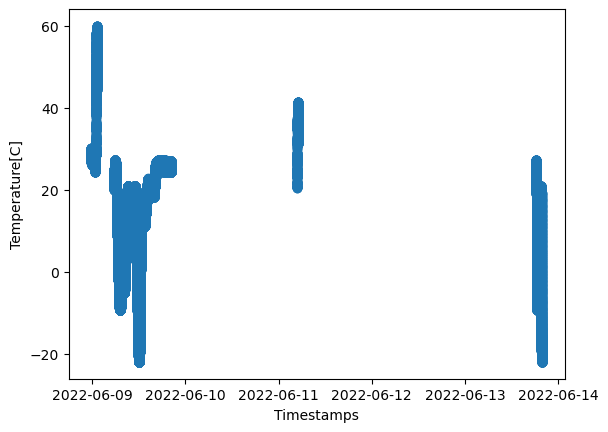

In [6]:
plt.scatter(data.index, data['Temperature[C]'])
plt.xlabel("Timestamps")
plt.ylabel("Temperature[C]")

Text(0, 0.5, 'Humidity[%]')

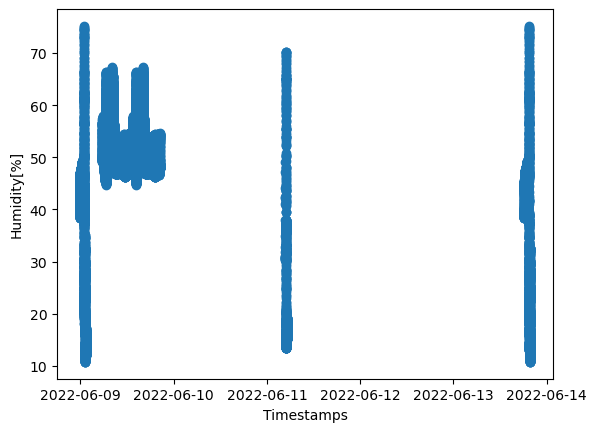

In [7]:
plt.scatter(data.index, data['Humidity[%]'])
plt.xlabel("Timestamps")
plt.ylabel("Humidity[%]")

## Train test split

In [8]:
y = data['Fire Alarm']
y

UTC
2022-06-09 05:38:51+05:30    0
2022-06-09 05:38:52+05:30    0
2022-06-09 05:38:53+05:30    0
2022-06-09 05:38:54+05:30    0
2022-06-09 05:38:55+05:30    0
                            ..
2022-06-13 19:50:47+05:30    0
2022-06-13 19:50:48+05:30    0
2022-06-13 19:50:49+05:30    0
2022-06-13 19:50:50+05:30    0
2022-06-13 19:50:51+05:30    0
Name: Fire Alarm, Length: 62630, dtype: int64

In [9]:
X = data.drop(columns=['Fire Alarm'])

In [10]:
X

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
UTC,,,,,,,,,,,,,
2022-06-09 05:38:51+05:30,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
2022-06-09 05:38:52+05:30,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2022-06-09 05:38:53+05:30,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
2022-06-09 05:38:54+05:30,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
2022-06-09 05:38:55+05:30,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-13 19:50:47+05:30,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
2022-06-13 19:50:48+05:30,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
2022-06-13 19:50:49+05:30,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)#Splitting the dataset into train and test


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50104, 13)
(12526, 13)
(50104,)
(12526,)


## Model building

### SVM -Linear Kernels

In [13]:
from sklearn.svm import SVC

In [14]:
#Initialize SVm
model1=SVC(kernel="linear")  # if data is linearly separable

#### Train the model

In [15]:
#training the model
msvc=model1.fit(X_train,y_train)

#### Test the model

In [16]:
#test the model
pred=msvc.predict(X_test)

In [17]:
pred

array([0, 1, 1, ..., 1, 0, 0])

#### Evaluate the model

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [19]:
confusion_matrix(y_test,pred)

array([[3585,   20],
       [  37, 8884]])

In [20]:
accuracy_score(y_test,pred)

0.9954494651125658

In [21]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      3605\n           1       1.00      1.00      1.00      8921\n\n    accuracy                           1.00     12526\n   macro avg       0.99      1.00      0.99     12526\nweighted avg       1.00      1.00      1.00     12526\n'

### SVM- Non Linear Kernel

In [22]:
# when we apply non-linear model on linearly separable data, model will be specific in prediction
# non Linear methos will be applied only on the data which is non-linearly sepaable

In [23]:
model2=SVC(kernel='rbf')

#### Train the model

In [24]:
#trainining the model
fit=model2.fit(X_train,y_train)

#### Test the model

In [25]:
#testing the model
pred=fit.predict(X_test)

In [26]:
pred

array([0, 1, 1, ..., 1, 0, 0])

#### Evaluate the model

In [27]:
confusion_matrix(pred,y_test)

array([[3558,  213],
       [  47, 8708]])

In [28]:
accuracy_score(y_test,pred)

0.9792431741976688

In [29]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.96      3605\n           1       0.99      0.98      0.99      8921\n\n    accuracy                           0.98     12526\n   macro avg       0.97      0.98      0.98     12526\nweighted avg       0.98      0.98      0.98     12526\n'

### Naive Bayes

In [30]:
#Initializing the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#### Train the model

In [31]:
nb.fit(X_train,y_train)

GaussianNB()

#### Test the model

In [32]:
#test the model
pred=nb.predict(X_test)

In [33]:
pred

array([1, 1, 1, ..., 1, 1, 1])

#### Evaluate the model

In [34]:
confusion_matrix(pred,y_test)

array([[1160,  202],
       [2445, 8719]])

In [35]:
accuracy_score(y_test,pred)

0.7886795465431902

In [36]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.32      0.47      3605\n           1       0.78      0.98      0.87      8921\n\n    accuracy                           0.79     12526\n   macro avg       0.82      0.65      0.67     12526\nweighted avg       0.80      0.79      0.75     12526\n'

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

#### Train the model

In [39]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

#### Test the model

In [40]:
pred=rf.predict(X_test)

In [41]:
pred

array([0, 1, 1, ..., 1, 0, 0])

#### Evaluate the model

In [42]:
confusion_matrix(pred,y_test)

array([[3605,    0],
       [   0, 8921]])

In [43]:
accuracy_score(y_test,pred)

1.0

In [44]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3605\n           1       1.00      1.00      1.00      8921\n\n    accuracy                           1.00     12526\n   macro avg       1.00      1.00      1.00     12526\nweighted avg       1.00      1.00      1.00     12526\n'

### Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

#### Train the model

In [46]:
logisticRegr.fit(X_train,y_train)

/Users/akashr/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Test the model

In [47]:
pred=logisticRegr.predict(X_test)

In [48]:
pred

array([0, 1, 0, ..., 1, 0, 0])

#### Evaluate the model

In [49]:
confusion_matrix(pred,y_test)

array([[3524,  235],
       [  81, 8686]])

In [50]:
accuracy_score(y_test,pred)

0.9747724732556283

In [51]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.98      0.96      3605\n           1       0.99      0.97      0.98      8921\n\n    accuracy                           0.97     12526\n   macro avg       0.96      0.98      0.97     12526\nweighted avg       0.98      0.97      0.97     12526\n'

<b>Through these experimentation and evaluation, the findings reveal that the SVM with non-linear kernel outperformed the other models, demonstrating superior performance in accurately categorizing smoke instances. Notably, the Random Forest model exhibited signs of overfitting, achieving 100% accuracy on the training data but failing to generalize effectively to unseen samples.</b>

## Exporting the models

In [52]:
import pickle
pickle.dump(model1,open("SVMLK.pkl","wb"))
pickle.dump(model2,open("SVMNLK.pkl","wb"))
pickle.dump(nb,open("NB.pkl","wb"))
pickle.dump(rf,open("RF.pkl","wb"))
pickle.dump(logisticRegr,open("LOGR.pkl","wb"))